In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations

In [6]:
# Step 1: Parse the CSV to create a mapping of words to manuscripts
def parse_csv(file_path):
    word_to_manuscripts = defaultdict(list)
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        for row in reader:
            word, manuscripts = row
            manuscripts_list = manuscripts.split(', ')
            for manuscript in manuscripts_list:
                word_to_manuscripts[manuscript].append(word)
    return word_to_manuscripts

# Step 2: Find all unique groups of manuscripts that share 2 or more words
def find_shared_words_groups(word_to_manuscripts):
    shared_words = defaultdict(list)

    for manuscripts in combinations(word_to_manuscripts.keys(), 2):
        shared = set(word_to_manuscripts[manuscripts[0]]) & set(word_to_manuscripts[manuscripts[1]])
        if len(shared) >= 2:
            shared_words[manuscripts].extend(shared)

    return shared_words

# Step 3: Filter out subsets
def filter_subsets(shared_words):
    filtered_groups = {}
    for group, words in shared_words.items():
        if not any(set(group) < set(other_group) and set(words) <= set(other_words) 
                   for other_group, other_words in filtered_groups.items()):
            filtered_groups[group] = words
    return filtered_groups

def build_confusion_matrix(word_to_manuscripts):
    manuscript_to_words = defaultdict(list)
    for manuscript, words in word_to_manuscripts.items():
        for word in words:
            manuscript_to_words[manuscript].append(word)
    
    # Sort manuscripts in alphabetical order before creating index mapping
    manuscripts = sorted(list(manuscript_to_words.keys()))
    n = len(manuscripts)
    index_mapping = {manuscript: i for i, manuscript in enumerate(manuscripts)}

    # Initialize an empty matrix
    matrix = np.zeros((n, n), dtype=int)

    # Populate the matrix
    for manuscript1, manuscript2 in combinations(manuscripts, 2):
        shared_words = len(set(manuscript_to_words[manuscript1]) & set(manuscript_to_words[manuscript2]))
        i, j = index_mapping[manuscript1], index_mapping[manuscript2]
        matrix[i, j] = shared_words  # Fill only upper triangle
    
    return matrix, index_mapping

def visualize_confusion_matrix(matrix, index_mapping):
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(matrix, interpolation='nearest', cmap='Blues')
    fig.colorbar(cax)

    # Set ticks positions and labels
    ax.set_xticks(np.arange(len(index_mapping)))
    ax.set_yticks(np.arange(len(index_mapping)))
    ax.set_xticklabels(index_mapping.keys(), rotation=90)
    ax.set_yticklabels(index_mapping.keys())

    # Grid lines based on the matrix size
    ax.set_xticks(np.arange(matrix.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(matrix.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    # Only plot annotations in the upper triangle to avoid clutter
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if i < j:  # Upper triangle
                text = ax.text(j, i, matrix[i, j],
                               ha="center", va="center", color="black")

    ax.set_title("Confusion Matrix of Shared Words")
    plt.xlabel('Manuscript Index')
    plt.ylabel('Manuscript Index')
    plt.show()

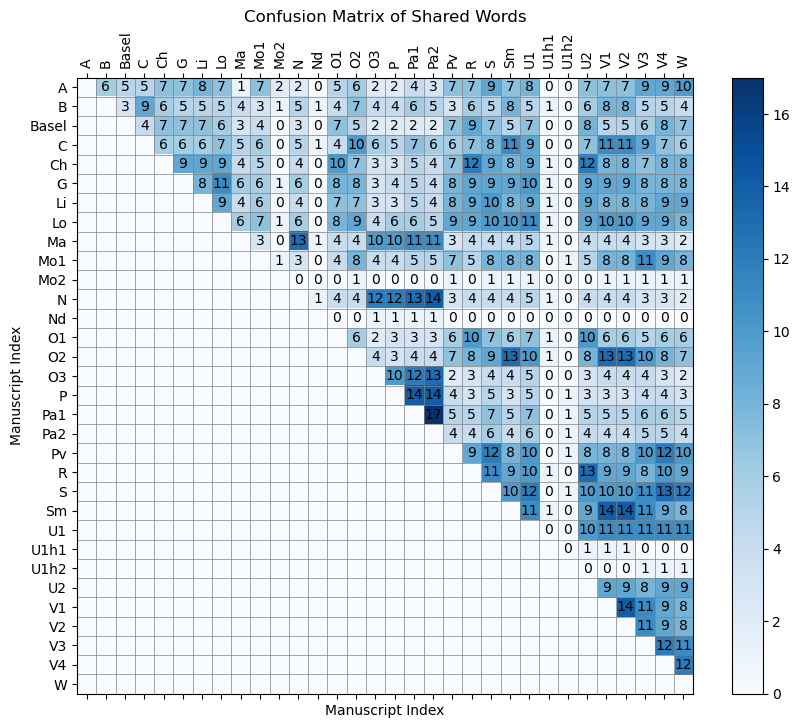

In [7]:
file_path = 'data.csv'
word_to_manuscripts = parse_csv(file_path)

# shared_words_groups = find_shared_words_groups(word_to_manuscripts)
# filtered_groups = filter_subsets(shared_words_groups)
# for group, words in filtered_groups.items():
#     print(f'Group: "{", ".join(group)}"\nCommon words: "{", ".join(words)}"\nCount of shared words: {len(words)}\n')

matrix, index_mapping = build_confusion_matrix(word_to_manuscripts)
visualize_confusion_matrix(matrix, index_mapping)